In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
cd ../TileEM/

/srv/data/home/jlee782/crowd-seg/analysis/TileEM


In [3]:
%load_ext autoreload
%autoreload 2
from paper_visualizations import * 
from PixelEM import * 
from test_sample import test_sample_obj
import json

In [13]:
final_df = pd.read_csv("cleaned_rerun_ground_truth_prj.csv",index_col=0)

keys=['num_workers','objid','thresh','J [MV]', u'J [GT]', u'J [basic]', u'J [GTLSA]', u'J [isoGT]','J [isoGTLSA]']

In [14]:
final_df.filter(regex="J").mean()

J [MV]          0.897003
J [GT]          0.905528
J [basic]       0.903689
J [GTLSA]       0.876710
J [isoGT]       0.894707
J [isoGTLSA]    0.861209
dtype: float64

# Comparing GT with Basic

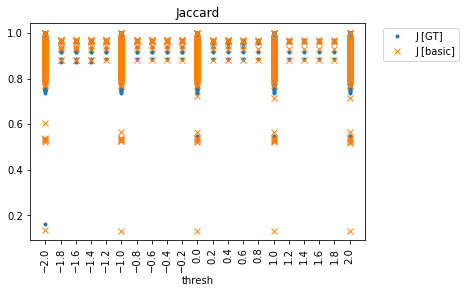

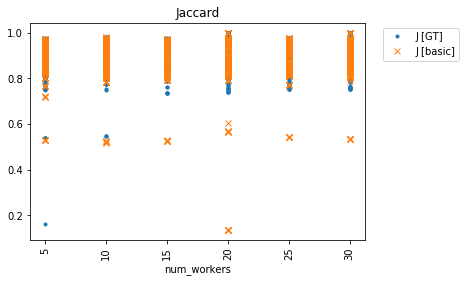

In [312]:
compare_PRJ_fixed_attr(final_df,"thresh","GT","basic",'J')

compare_PRJ_fixed_attr(final_df,"num_workers","GT","basic",'J')

In [15]:
final_df[final_df["J [GT]"]<0.5][keys]

,num_workers,objid,thresh,J [MV],J [GT],J [basic],J [GTLSA],J [isoGT],J [isoGTLSA]
268,5,29,-2,0.868662,0.161967,0.86507,0.774943,0.847832,0.851941


Even though object 29 is naturally confusing because of lots of overbounding workers, the MV and basic still does well 

In [317]:
# final_df[final_df["objid"]==29].filter(regex="J")

In [327]:
final_df[final_df["J [GT]"]<0.6][keys]

,num_workers,objid,thresh,J [MV],J [GT],J [basic],J [GTLSA],J [isoGT],J [isoGTLSA]
103,5,7,-2,0.529387,0.536744,0.529387,0.014117,0.014554,0.014534
104,5,7,-1,0.529387,0.536744,0.529387,0.014117,0.559589,0.559941
105,5,7,0,0.529387,0.536744,0.529387,0.509239,0.559932,0.091106
106,5,7,1,0.529387,0.536744,0.529387,0.502336,0.555437,0.086188
107,5,7,2,0.529387,0.536744,0.529387,0.054795,0.044518,0.037636
268,5,29,-2,0.868662,0.161967,0.865070,0.774943,0.847832,0.851941
738,10,7,0,0.517687,0.546104,0.523090,0.720190,0.762841,0.757131
739,10,7,1,0.517687,0.546104,0.524042,0.717346,0.532692,0.514854
740,10,7,2,0.517687,0.546104,0.517687,0.717748,0.070794,0.500874


In [322]:
final_df[(final_df["J [GT]"]<0.75)&(final_df["J [GT]"]>0.7)].filter(regex="J")

,J [MV],J [GT],J [basic],J [GTLSA],J [isoGT],J [isoGTLSA]
303,0.767993,0.749900,0.767993,0.845083,0.726853,0.732519
467,0.806709,0.735166,0.806709,0.751479,0.740146,0.751479
468,0.806709,0.735166,0.806709,0.757079,0.740146,0.757079
469,0.806709,0.735166,0.806709,0.755589,0.740146,0.755589
470,0.806709,0.735166,0.806709,0.755589,0.740146,0.755589
471,0.806709,0.735166,0.806709,0.755589,0.740146,0.755589
736,0.517687,0.749265,0.521432,0.721636,0.014533,0.014120
1040,0.812914,0.744493,0.809370,0.758982,0.752239,0.769939
1041,0.812914,0.740088,0.809370,0.755622,0.752239,0.771121
1042,0.812914,0.741176,0.809370,0.755622,0.752239,0.771121


Cases where isoGT performs badly 

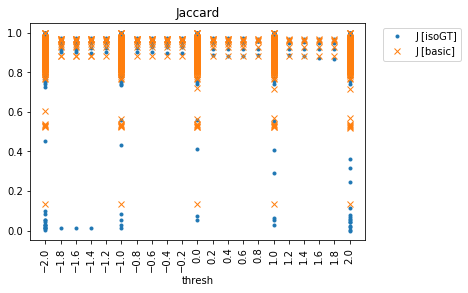

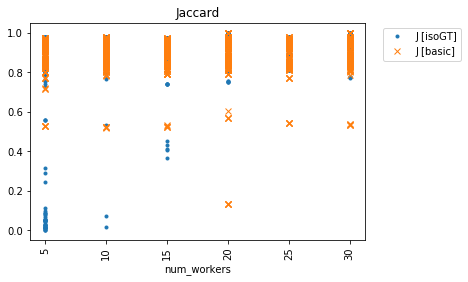

In [328]:
compare_PRJ_fixed_attr(final_df,"thresh","isoGT","basic",'J')

compare_PRJ_fixed_attr(final_df,"num_workers","isoGT","basic",'J')

In [332]:
final_df[(final_df["J [isoGT]"]<0.5)][keys]

,num_workers,objid,thresh,J [MV],J [GT],J [basic],J [GTLSA],J [isoGT],J [isoGTLSA]
45,5,13,2.0,0.928437,0.935684,0.928437,0.876081,0.045499,0.051659
103,5,7,-2.0,0.529387,0.536744,0.529387,0.014117,0.014554,0.014534
107,5,7,2.0,0.529387,0.536744,0.529387,0.054795,0.044518,0.037636
148,5,2,2.0,0.928316,0.917808,0.928316,0.033390,0.112100,0.008398
165,5,4,-2.0,0.880530,0.874386,0.880530,0.888312,0.010867,0.010868
166,5,4,-1.0,0.880530,0.874386,0.880530,0.879781,0.010867,0.899390
170,5,4,-1.8,0.880530,0.874386,0.880530,0.888798,0.010867,0.010862
171,5,4,-1.6,0.880530,0.874386,0.880530,0.887978,0.010867,0.894318
172,5,4,-1.4,0.880530,0.874386,0.880530,0.887978,0.010867,0.901245
178,5,6,-2.0,0.843750,0.781755,0.843750,0.881735,0.002230,0.848912


5worker_rand0 object 13 is an example of where iso failes but the result does fine. 

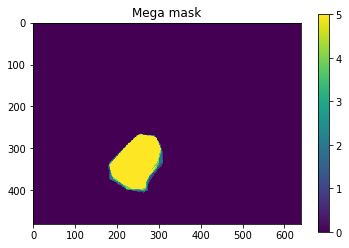

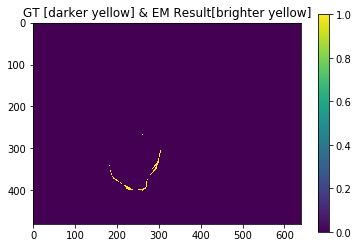

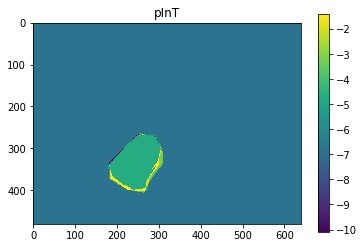

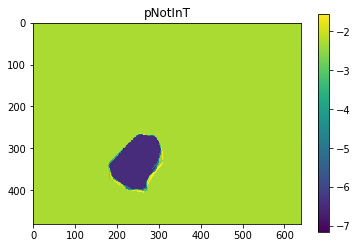

In [333]:
mega,result, gt,pInT,pNotInT =  plot_masks("5workers_rand0",13,2,"isoGT",returnMatrix=True)
# [result] = plot_masks("5workers_rand0",1,0,"isoGT",include=["ResultOnly"],returnMatrix=True)

In [344]:
def load_qn_qp(batch,objid,algo,thresh):
    qn = pkl.load(open("pixel_em/{}/obj{}/{}_qn_ground_truth_thresh{}.pkl".format(batch,objid,algo,thresh)))
    qp = pkl.load(open("pixel_em/{}/obj{}/{}_qp_ground_truth_thresh{}.pkl".format(batch,objid,algo,thresh)))
    return qn,qp

In [345]:
load_qn_qp("5workers_rand0",13,"isoGT",2)

({133: 0.33068520357497516,
  161: 0.8917576961271102,
  170: 0.7994041708043694,
  239: 0.7269116186693148,
  259: 0.6047666335650447},
 {133: 0.9636194029850746,
  161: 0.5289179104477612,
  170: 0.03544776119402985,
  239: 0.5802238805970149,
  259: 0.8376865671641791})

In [346]:
cat pixel_em/5workers_rand0/obj13/worker_ids.json

[161, 239, 170, 259, 133]

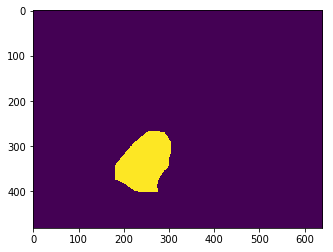

In [347]:
worker_mask = pkl.load(open("pixel_em/obj13/mask259.pkl"))

plt.imshow(worker_mask)

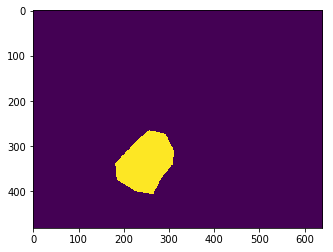

In [348]:
worker_mask = pkl.load(open("pixel_em/obj13/mask133.pkl"))

plt.imshow(worker_mask)

need to overlay ground truth BB on top of this otherwise it is hard to tell 

worker 133 didn't perform particularly poorly but I'm not sure why his quality score is so low

------------------------------------------------------------------------